In [1]:
# to import from parent directory
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [11]:
import numpy as np
from utils import load_obj, get_average
import matplotlib.pyplot as plt
from matplotlib import style

In [4]:
losses_one_layer = load_obj("FF_Core_One_Layer_Losses")
losses_two_layer = load_obj("FF_Core_Two_Layer_Losses")

In [5]:
def extract_best_loss(losses):
    best_loss_8 = []
    avg_loss_8 = []
    best_loss_16 = []
    avg_loss_16 = []
    best_loss_24 = []
    avg_loss_24 = []

    for k, v in losses.items():
        if k[1:] == str(8) or k[2:] == str(8):
            best_net_index = np.argmin(v)
            best_loss_8.append(v[best_net_index])
            avg_loss_8.append(get_average(v))
        if k[1:] == str(16) or k[2:] == str(16):
            best_net_index = np.argmin(v)
            best_loss_16.append(v[best_net_index])
            avg_loss_16.append(get_average(v))
        if k[1:] == str(24) or k[2:] == str(24):
            best_net_index = np.argmin(v)
            best_loss_24.append(v[best_net_index])
            avg_loss_24.append(get_average(v))

    best_loss = []
    avg_loss = []

    for i in range(len(best_loss_8)):
        best_loss.append((best_loss_8[i] + best_loss_16[i] + best_loss_24[i]) / 3)
        avg_loss.append((avg_loss_8[i] + avg_loss_16[i] + avg_loss_24[i]) / 3)
        
    return best_loss, avg_loss

In [10]:
best_loss_one, avg_loss_one = extract_best_loss(losses_one_layer)
best_loss_two, avg_loss_two = extract_best_loss(losses_two_layer)

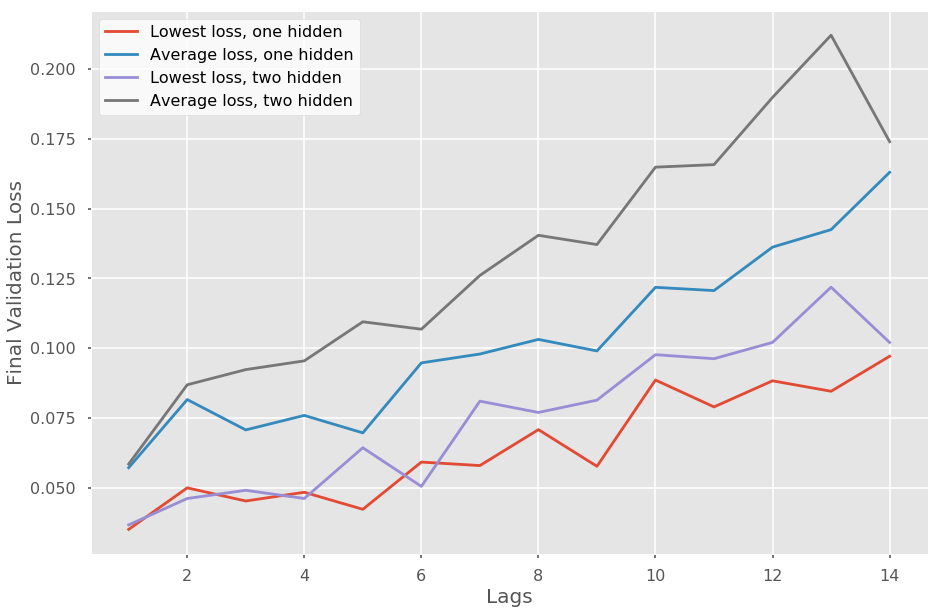

In [14]:
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')

plt.figure(figsize=(15,10))

plt.plot([i for i in range(1, len(best_loss_one) + 1)], best_loss_one)
plt.plot([i for i in range(1, len(best_loss_one) + 1)], avg_loss_one)
plt.plot([i for i in range(1, len(best_loss_one) + 1)], best_loss_two)
plt.plot([i for i in range(1, len(best_loss_one) + 1)], avg_loss_two)

plt.legend(("Lowest loss, one hidden", "Average loss, one hidden",
           "Lowest loss, two hidden", "Average loss, two hidden"), facecolor="white")
plt.xlabel("Lags", fontsize=20)
plt.ylabel("Final Validation Loss", fontsize=20)
plt.savefig('../Figs/lags_shallow.png', bbox_inches='tight')

In [16]:
lowest = 100000000

for k, v in losses_two_layer.items():
    best_loss = v[np.argmin(v)]
    if best_loss < lowest:
        lowest = best_loss
        
lowest

0.02561834941403575